# mehmetfatih

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
temperature = pd.read_csv('dataset/weatherHistory.csv', index_col=0)
temperature.index.name=['Tarih']
temperature.columns= ['genel_durum','yagis','sicaklik','hissedilen_sicaklik','nem','ruzgar_hizi','ruzgar', 'gorus_mesafesi', 'loud_cover','basinc', 'gunluk_durum']
temperature.tail(2)

,genel_durum,yagis,sicaklik,hissedilen_sicaklik,nem,ruzgar_hizi,ruzgar,gorus_mesafesi,loud_cover,basinc,gunluk_durum
[Tarih],,,,,,,,,,,
2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.
2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39.0,15.5204,0.0,1016.16,Partly cloudy starting in the morning.


In [3]:
temperature.corr().sicaklik.abs()

sicaklik               1.000000
hissedilen_sicaklik    0.992629
nem                    0.632255
ruzgar_hizi            0.008957
ruzgar                 0.029988
gorus_mesafesi         0.392847
loud_cover                  NaN
basinc                 0.005447
Name: sicaklik, dtype: float64

In [4]:
Y = temperature['sicaklik']
X = temperature[['nem','ruzgar_hizi','ruzgar','basinc']]
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]
Sabit değer (bias): 
 37.92643818528534


## 1 :Katsayılarda modelin doğrusallığı

In [6]:
df = pd.DataFrame()

df["X"] = np.arange(0,1000,1)
df["X_sq"] = df["X"]**2
df["Y"] = 1 + 2*df["X"] + 3*df["X_sq"]
df.head()

,X,X_sq,Y
0,0,0,1
1,1,1,6
2,2,4,17
3,3,9,34
4,4,16,57


In [7]:
lrm_ornek = linear_model.LinearRegression()
lrm_ornek.fit(df[["X","X_sq"]],df["Y"])

tahmin = lrm_ornek.predict(df[["X","X_sq"]])

print('Değişkenler: \n', lrm_ornek.coef_)
print('Sabit değer (bias): \n', lrm_ornek.intercept_)

Değişkenler: 
 [2. 3.]
Sabit değer (bias): 
 0.999999999650754


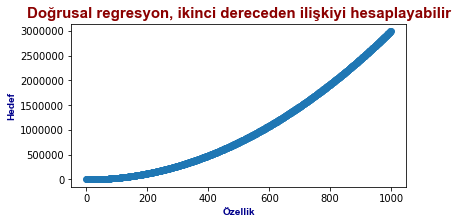

In [8]:
baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(6,3))
plt.scatter(df["X"], tahmin)
plt.xlabel("Özellik", fontdict=eksen_font)
plt.ylabel("Hedef", fontdict=eksen_font)
plt.title('Doğrusal regresyon, ikinci dereceden ilişkiyi hesaplayabilir', fontdict=baslik_font)
plt.show()

Doğrusal regresyon modeli gerçek katsayıları doğru bir şekilde tahmin etmiş ve hedef ile özellik arasındaki ikinci dereceden ilişkiyi yakalamıştır.

## 2 :Hata terimi ortalamada sıfır olmalıdır

In [9]:
tahmin = lrm.predict(X)
hatalar = Y - tahmin

print("Sıcaklık Modelinin ortalama hatası : {:.10f}".format(np.mean(hatalar)))

Sıcaklık Modelinin ortalama hatası : -0.0000000000


Modelin hatalarının ortalaması sıfırdır.

## 3 :homoscedasticity

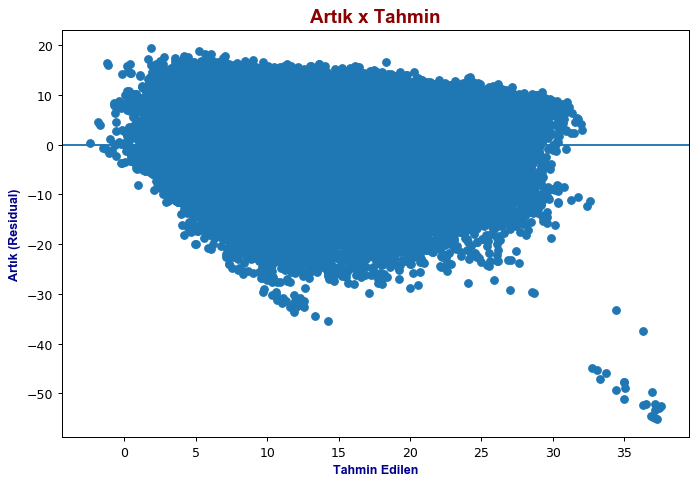

In [10]:
plt.figure(figsize=(9,6), dpi=90)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen', fontdict=eksen_font)
plt.ylabel('Artık (Residual)', fontdict=eksen_font)
plt.axhline(y=0)
plt.title('Artık x Tahmin', fontdict=baslik_font)
plt.show()

In [11]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

print("Bartlett test değeri : {0:3g} ve p değeri : {1:.5f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.5f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 2464.84 ve p değeri : 0.00000
Levene test değeri   : 2321.24 ve p değeri : 0.00000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

## 4 :Düşük çoklu doğrusallık/low multicollinearity

In [12]:
ctr=temperature.corr().sicaklik.abs()[['nem','ruzgar_hizi','ruzgar','basinc']]
ctr

nem            0.632255
ruzgar_hizi    0.008957
ruzgar         0.029988
basinc         0.005447
Name: sicaklik, dtype: float64

Buna çoklu doğrusallık denir!

## 5 :Hata terimleri birbiriyle ilişkisiz olmalıdır

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(hatalar)

plt.figure(figsize=(9,6))
plt.plot(acf_data[1:])
plt.show()

Modelimizin hataları arasındaki otokorelasyon gerçekten çok düşüktür (-0,06 ile 0,04 arasında).

## 6 :Özellikler hatalarla korele olmamalıdır.

Bootcampin dışında.?????

## 7 :Hataların Normalliği

In [ ]:
rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken", fontdict=eksen_font)
plt.ylabel("Modelin hataları", fontdict=eksen_font)
plt.title("QQ plotu", fontdict=baslik_font)

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar", fontdict=eksen_font)
plt.title("Hataların histogramı", fontdict=baslik_font)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.5f}".format(norm_stats[0], norm_stats[1]))

Her iki testin p-değerleri, hatalarımızın normal olarak dağılmadığını gösterir.

WORK FİNİSHED.